In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [41]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [26]:
run1 = RunManager('StatArbStrategy', 'run_0150')
run2 = RunManager('StatArbStrategy', 'run_0151')
run3 = RunManager('StatArbStrategy', 'run_0152')

In [10]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,1.045126,0.085783,-999.0
1,clusters,True,288,0.678272,0.088028,-999.0
2,data_rank_flag,False,288,0.907540,0.091824,-999.0
3,data_rank_flag,True,288,0.815858,0.081987,-999.0
4,drop_binaries,False,288,0.881811,0.089241,-999.0
5,drop_binaries,True,288,0.841588,0.084570,-999.0
6,holding_period,3,192,0.893212,0.087115,-999.0
7,holding_period,5,192,0.863184,0.087266,-999.0
8,holding_period,7,192,0.828701,0.086336,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.861699,0.086906,-999.0


In [11]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,0.489848,0.044030,-999.0
1,clusters,True,288,0.380947,0.048076,-999.0
2,data_rank_flag,False,288,0.392089,0.041373,-999.0
3,data_rank_flag,True,288,0.478706,0.050732,-999.0
4,drop_binaries,False,288,0.451138,0.047903,-999.0
5,drop_binaries,True,288,0.419657,0.044203,-999.0
6,holding_period,3,192,0.554387,0.056430,-999.0
7,holding_period,5,192,0.404848,0.043262,-999.0
8,holding_period,7,192,0.346958,0.038466,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.435397,0.046053,-999.0


In [12]:
run3.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,0.629648,0.041543,-999.0
1,clusters,True,288,0.417343,0.046056,-999.0
2,data_rank_flag,False,288,0.508858,0.041445,-999.0
3,data_rank_flag,True,288,0.538133,0.046153,-999.0
4,drop_binaries,False,288,0.534183,0.044885,-999.0
5,drop_binaries,True,288,0.512808,0.042713,-999.0
6,holding_period,3,192,0.614338,0.049274,-999.0
7,holding_period,5,192,0.502666,0.042349,-999.0
8,holding_period,7,192,0.453482,0.039775,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.523495,0.043799,-999.0


# Combination search

In [27]:
# Create combo search
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...




  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...





  5%|▌         | 1/20 [00:12<03:48, 12.04s/it]

 10%|█         | 2/20 [00:24<03:38, 12.15s/it]

 15%|█▌        | 3/20 [00:36<03:27, 12.22s/it]

 20%|██        | 4/20 [00:49<03:16, 12.26s/it]

 25%|██▌       | 5/20 [01:01<03:04, 12.30s/it]

 30%|███       | 6/20 [01:13<02:52, 12.32s/it]

 35%|███▌      | 7/20 [01:26<02:40, 12.35s/it]

 40%|████      | 8/20 [01:38<02:27, 12.28s/it]

 45%|████▌     | 9/20 [01:50<02:15, 12.30s/it]

 50%|█████     | 10/20 [02:03<02:03, 12.32s/it]

 55%|█████▌    | 11/20 [02:15<01:50, 12.26s/it]

 60%|██████    | 12/20 [02:27<01:37, 12.24s/it]

 65%|██████▌   | 13/20 [02:39<01:25, 12.23s/it]

 70%|███████   | 14/20 [02:51<01:13, 12.19s/it]

 75%|███████▌  | 15/20 [03:04<01:01, 12.24s/it]

 80%|████████  | 16/20 [03:16<00:49, 12.26s/it]

 85%|████████▌ | 17/20 [03:28<00:36, 12.27s/it]

 90%|█████████ | 18/20 [03:40<00:24, 12.22s/it]

 95%|█████████▌| 19/20 [03:52<00:12, 12.18s/it]

100%|██████████| 20/20 [04:05<00:00, 12.21s/it]



In [28]:
# Create combo search
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:26<00:00, 10.44s/it]


In [29]:
# Create combo search
comb3 = CombinationSearch()
comb3.set_selection_criteria('sharpe')
comb3.params['training_epochs'] = 20

comb3.add_run(run3)
comb3.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [04:05<00:00, 12.19s/it]


## Check Sector 20 in present era

In [42]:
drop_params = [('clusters', False)]
run1a = RunManager('StatArbStrategy', 'run_0150', drop_params=drop_params)

drop_params = [('clusters', True)]
run2a = RunManager('StatArbStrategy', 'run_0150', drop_params=drop_params)

In [43]:
run1a.import_return_frame()
run2a.import_return_frame()

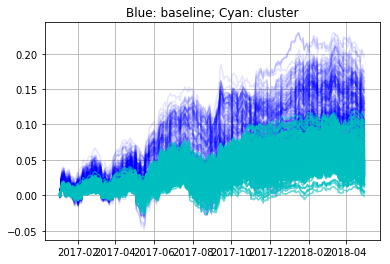

In [45]:
plt.figure()
plt.plot(run2a.returns.loc[dt.date(2017, 1, 1):].cumsum(), 'b', alpha=0.1)
plt.plot(run1a.returns.loc[dt.date(2017, 1, 1):].cumsum(), 'c', alpha=0.6)
plt.title('Blue: baseline; Cyan: cluster')
plt.grid()
plt.show()

In [30]:
drop_params = [('clusters', False)]
run1a = RunManager('StatArbStrategy', 'run_0150', drop_params=drop_params)

drop_params = [('clusters', True)]
run2a = RunManager('StatArbStrategy', 'run_0150', drop_params=drop_params)

In [31]:
# Create combo search
comb4 = CombinationSearch()
comb4.set_selection_criteria('sharpe')
comb4.params['training_epochs'] = 20

comb4.add_run(run1a)
comb4.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:58<00:00, 11.95s/it]


In [32]:
# Create combo search
comb5 = CombinationSearch()
comb5.set_selection_criteria('sharpe')
comb5.params['training_epochs'] = 20

comb5.add_run(run2a)
comb5.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [03:57<00:00, 11.89s/it]


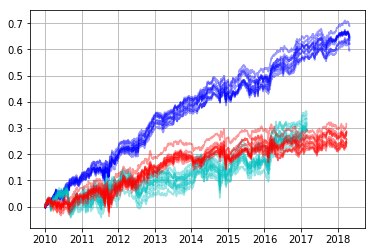

In [38]:
plt.figure()

plt.plot(comb1.best_results_returns.dropna().cumsum(), 'b', alpha=0.4)
plt.plot(comb2.best_results_returns.dropna().cumsum(), 'c', alpha=0.4)
plt.plot(comb3.best_results_returns.dropna().cumsum(), 'r', alpha=0.4)
# plt.plot(comb4.best_results_returns.dropna().cumsum(), 'g', alpha=0.4)
# plt.plot(comb5.best_results_returns.dropna().cumsum(), 'm', alpha=0.4)
plt.title('Blue Sector 20; Cyan Sector 45; Red Top 300')
plt.grid()
plt.show()

In [40]:
# Try 2
run5 = RunManager('StatArbStrategy', 'run_0154')
run5.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,clusters,False,288,0.424027,0.059872,-999.0
1,clusters,True,288,0.257195,0.057924,-999.0
2,data_rank_flag,False,288,0.320406,0.054872,-999.0
3,data_rank_flag,True,288,0.360815,0.062924,-999.0
4,drop_binaries,False,288,0.338412,0.059138,-999.0
5,drop_binaries,True,288,0.342809,0.058658,-999.0
6,holding_period,3,192,0.395024,0.065251,-999.0
7,holding_period,5,192,0.325854,0.056711,-999.0
8,holding_period,7,192,0.300955,0.054733,-999.0
9,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",576,0.340611,0.058898,-999.0
